# Installazione e import pacchetti

In [120]:
# %pip install pandas
# %pip install openpyxl
# %pip install statsmodels
# %pip install seaborn
# %pip install tqdm

     ---------------------------------------- 78.4/78.4 KB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\marco\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
from openpyxl import Workbook
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import seaborn as sns
from time import sleep
from tqdm import tqdm

In [2]:
%matplotlib inline
pd.plotting.register_matplotlib_converters()
sns.set_style("darkgrid")

# Import dataset

In [3]:
# Path Remo
path_index = 'C:/Users/marco/OneDrive/UNIMIB_DataScience/99-PROJECTS/FinancialMarketAnalytics2022/Financial_Market_Analytics/Dataset/NASDAQ_INDEX.xlsx'
path_stocks = 'C:/Users/marco/OneDrive/UNIMIB_DataScience/99-PROJECTS/FinancialMarketAnalytics2022/Financial_Market_Analytics/Dataset/STOCKS.xlsx'

In [4]:
df_index = pd.read_excel(path_index, header=0, parse_dates=[0], index_col=0)
df_index=df_index.rename(columns={'NASDAQ_Index':"Mkt-RF"})

In [5]:
display(df_index)

,Mkt-RF
Date,
2017-07-07,5656.47
2017-07-10,5694.15
2017-07-11,5709.80
2017-07-12,5778.95
2017-07-13,5793.36
...,...
2022-07-01,11585.68
2022-07-05,11779.90
2022-07-06,11852.59


In [18]:
df_stocks = pd.read_excel(path_stocks, header=0, parse_dates=[0], index_col=0)
print(type(df_stocks))

<class 'pandas.core.frame.DataFrame'>


In [7]:
display(df_stocks)

,"Airbnb, Inc. Class A (ABNB-US)","Lucid Group, Inc. (LCID-US)",Datadog Inc Class A (DDOG-US),"CrowdStrike Holdings, Inc. Class A (CRWD-USA)","Zscaler, Inc. (ZS-US)",Constellation Energy Corporation (CEG-US),"Fortinet, Inc. (FTNT-US)","Palo Alto Networks, Inc. (PANW-US)","Old Dominion Freight Line, Inc. (ODFL-US)",Astrazeneca PLC Sponsored ADR (AZN-US),...,NortonLifeLock Inc. (NLOK-US),"Henry Schein, Inc. (HSIC-US)","Illumina, Inc. (ILMN-US)","Analog Devices, Inc. (ADI-US)","Autodesk, Inc. (ADSK-US)","Mattel, Inc. (MAT-US)",Walgreens Boots Alliance Inc (WBA-US),Vodafone Group Plc Sponsored ADR (VOD-US),Fastenal Company (FAST-US),Cintas Corporation (CTAS-US)
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.076734,98.785828,98.193016,100.331337,100.406504,100.528592,99.599845,100.139470,99.681021,100.325061
2017-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.111932,98.818640,100.604265,101.771378,100.948509,100.336377,99.767652,98.919107,99.316473,99.762150
2017-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.315030,100.180492,100.650747,102.421308,103.252033,100.336377,100.064541,100.767085,97.334245,100.816618
2017-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.863780,99.775763,100.517111,102.293870,103.629501,99.615569,100.697044,101.324965,98.359535,100.269563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,63.167715,171.890799,269.107856,309.051724,470.818182,137.142857,745.258470,373.301506,400.158401,195.407407,...,NaN,NaN,110.998780,182.120556,168.273326,NaN,49.774106,NaN,226.657553,298.668041
2022-07-05,66.298113,174.216380,288.628495,322.448276,503.969697,130.809524,766.432800,382.769005,397.107502,194.103704,...,NaN,NaN,112.149207,182.324455,171.215641,NaN,49.709565,NaN,226.338574,297.597717
2022-07-06,64.183539,184.226491,287.696405,320.551724,496.212121,135.142857,777.734436,378.229893,405.033708,197.007407,...,NaN,NaN,113.526233,184.401682,171.051103,NaN,48.767265,NaN,229.756209,301.371601


In [ ]:
# Estraggo solo il symbol, ovvero il valore tra parentesi
old = df_stocks.columns.to_list()
new = df_stocks.columns.to_list()
for i in range(len(old)):
    start = new[i].index('(')
    end = new[i].index(')',start+1)
    substring=new[i][start+1:end]
    new[i]=substring

In [142]:
# Creo un dizionario con chiave il vecchio valore della colonna e come il valore il nuovo valore
def renaming_columns(old, new):
    rename_list = dict.fromkeys(old)
    for i in range(len(new)):
        rename_list[old[i]] = new[i]
    return rename_list
renamed_column_name = renaming_columns(old, new)

In [145]:
# Rinomino tutte le colonne del dataframe
df_stocks=df_stocks.rename(columns=renamed_column_name)
df_stocks.head()

,ABNB-US,LCID-US,DDOG-US,CRWD-USA,ZS-US,CEG-US,FTNT-US,PANW-US,ODFL-US,AZN-US,...,NLOK-US,HSIC-US,ILMN-US,ADI-US,ADSK-US,MAT-US,WBA-US,VOD-US,FAST-US,CTAS-US
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.076734,98.785828,98.193016,100.331337,100.406504,100.528592,99.599845,100.139470,99.681021,100.325061
2017-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.111932,98.818640,100.604265,101.771378,100.948509,100.336377,99.767652,98.919107,99.316473,99.762150
2017-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.315030,100.180492,100.650747,102.421308,103.252033,100.336377,100.064541,100.767085,97.334245,100.816618
2017-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.863780,99.775763,100.517111,102.293870,103.629501,99.615569,100.697044,101.324965,98.359535,100.269563


# Log return

In [146]:
# Stocks dataset
df_stocks_log_ret=df_stocks.copy()
for column in df_stocks:
   df_stocks_log_ret[column]= df_stocks_log_ret[column].pct_change().apply(lambda x: np.log(1+x))
display(df_stocks_log_ret)


,ABNB-US,LCID-US,DDOG-US,CRWD-USA,ZS-US,CEG-US,FTNT-US,PANW-US,ODFL-US,AZN-US,...,NLOK-US,HSIC-US,ILMN-US,ADI-US,ADSK-US,MAT-US,WBA-US,VOD-US,FAST-US,CTAS-US
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020555,-0.012216,-0.018235,0.003308,0.004057,0.005272,-0.004010,0.001394,-0.003195,0.003245
2017-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000345,0.000332,0.024260,0.014251,0.005384,-0.001914,0.001683,-0.012261,-0.003664,-0.005627
2017-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.030887,0.013687,0.000462,0.006366,0.022562,0.000000,0.002971,0.018509,-0.020161,0.010514
2017-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014599,-0.004048,-0.001329,-0.001245,0.003649,-0.007210,0.006301,0.005521,0.010479,-0.005441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.025820,-0.009368,0.059215,0.061490,0.038446,0.005920,0.013866,0.028559,0.018288,-0.001818,...,0.000000,0.000000,0.035592,-0.022008,0.010988,0.000000,0.017264,0.000000,-0.003612,0.008477
2022-07-05,0.048368,0.013439,0.070028,0.042434,0.068044,-0.047281,0.028016,0.025045,-0.007653,-0.006694,...,0.000000,0.000000,0.010311,0.001119,0.017334,0.000000,-0.001298,0.000000,-0.001408,-0.003590
2022-07-06,-0.032415,0.055868,-0.003235,-0.005899,-0.015513,0.032590,0.014638,-0.011929,0.019763,0.014849,...,0.000000,0.000000,0.012204,0.011329,-0.000961,0.000000,-0.019138,0.000000,0.014987,0.012601


In [149]:
# Market index 
df_index_log_ret=df_index.copy()
df_index_log_ret['Mkt-RF']=df_index_log_ret['Mkt-RF'].pct_change().apply(lambda x: np.log(1+x))
display(df_index_log_ret)

,Mkt-RF
Date,
2017-07-07,NaN
2017-07-10,0.006639
2017-07-11,0.002745
2017-07-12,0.012038
2017-07-13,0.002490
...,...
2022-07-01,0.007099
2022-07-05,0.016625
2022-07-06,0.006152


# Rolling regression

In [ ]:
y_var = list(df_stocks_log_ret)
exog = sm.add_constant(df_index_log_ret['Mkt-RF'])

key_list =['alpha', 'beta', 'R2', 'Specific Risk', 'Sistemati Risk', 'Total Risk']
roll_res=dict.fromkeys(key_list)

roll_res['Alpha']={}
roll_res['Beta']={}
roll_res['R2']={}
roll_res['Specific Risk']={}
roll_res['Systematic Risk']={}
roll_res['Total Risk']={}

for endog in tqdm(y_var):
    results = RollingOLS(df_stocks_log_ret[endog], exog, window=180, min_nobs=180)
    rres=results.fit()

    roll_res['Alpha'][endog]=rres.params['const']
    roll_res['Beta'][endog]=rres.params['Mkt-RF']
    roll_res['R2'][endog]=rres.rsquared
    roll_res['Specific Risk'][endog]=rres.mse_resid
    roll_res['Systematic Risk'][endog]=rres.mse_model
    roll_res['Total Risk'][endog]=rres.mse_total

c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood


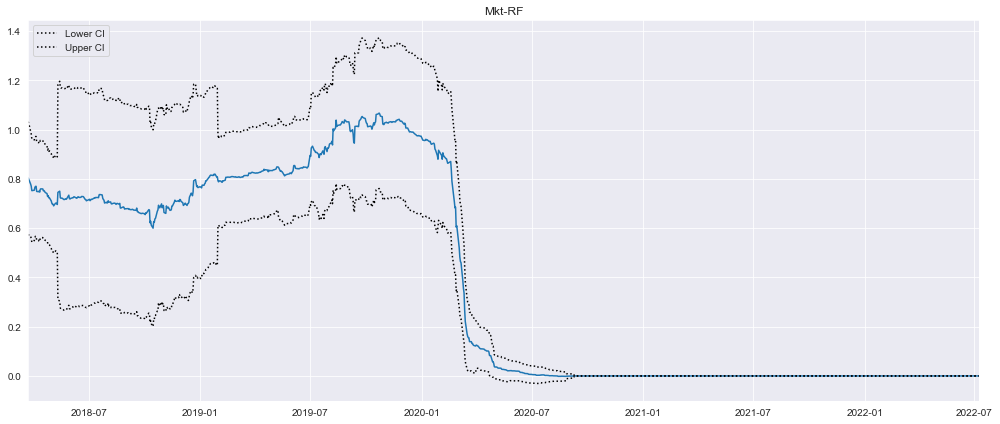

In [221]:
# Prove
results = RollingOLS(df_stocks_log_ret['NLOK-US'], exog, window=180)
rres=results.fit()
fig = rres.plot_recursive_coefficient(variables=["Mkt-RF"], figsize=(14, 6))

# Matrice $R^2$

In [223]:
roll_r2 = pd.DataFrame(rolling_results['R2'])

# Matrice $\alpha$

In [224]:
roll_alpha = pd.DataFrame(rolling_results['Alpha'])

# Matrice $\beta$

In [225]:
roll_beta = pd.DataFrame(rolling_results['Beta'])

# Matrice Rischio Sistematico

In [226]:
roll_systematic = pd.DataFrame(rolling_results['Systematic Risk'])

# Matrice Rischio Specifico

In [227]:
roll_specific = pd.DataFrame(rolling_results['Specific Risk'])

# Matrice Rischio Totale

In [228]:
roll_total = pd.DataFrame(rolling_results['Total Risk'])